In [ ]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install numpy pandas

In [ ]:
!pip install scikit-learn

In [ ]:
# !pip install --upgrade pip setuptools wheel


In [ ]:
!pip install statsmodels

In [ ]:
#import the numpy and the pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [ ]:
bikesharing = pd.read_csv("/content/day (1).csv")

In [ ]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bikesharing.shape

(730, 16)

In [ ]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<Axes: xlabel='cnt', ylabel='weathersit'>

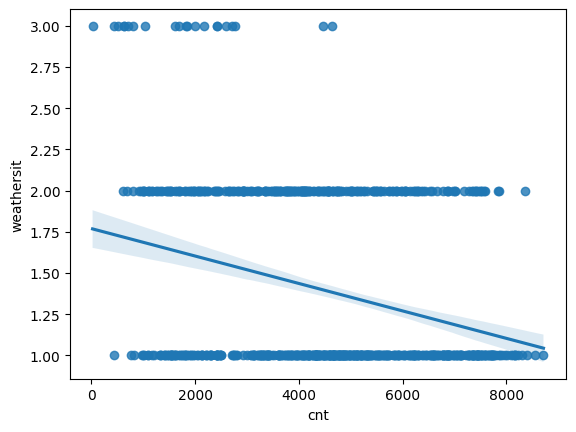

In [ ]:
sns.regplot(x= 'cnt', y ='weathersit', data = bikesharing)

<Axes: xlabel='windspeed', ylabel='cnt'>

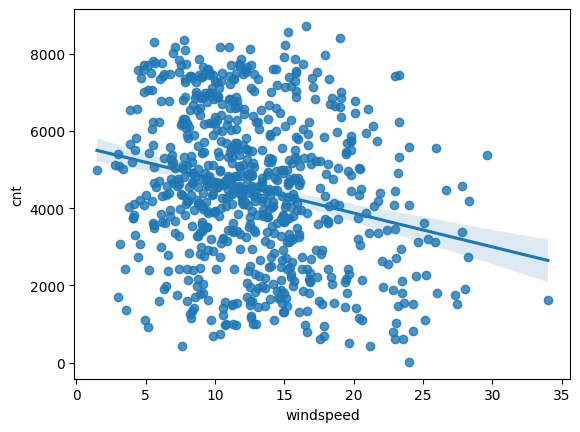

In [ ]:
sns.regplot(x= 'windspeed', y ='cnt',data=bikesharing)

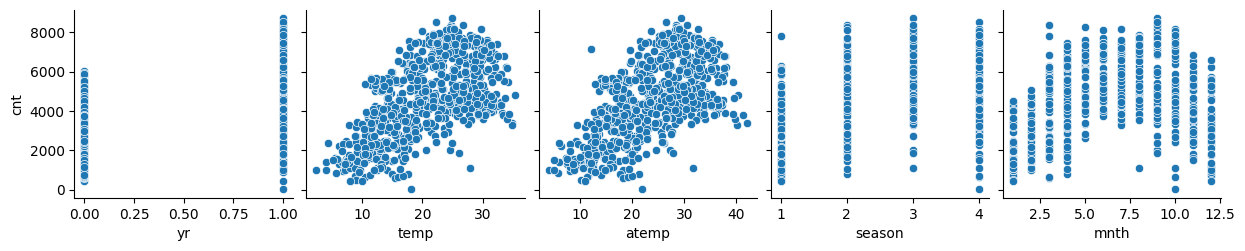

In [ ]:
sns.pairplot(bikesharing,x_vars=['yr','temp','atemp','season','mnth'],y_vars='cnt')

In [ ]:
numeric_data = bikesharing.select_dtypes(include=['number'])

<Axes: >

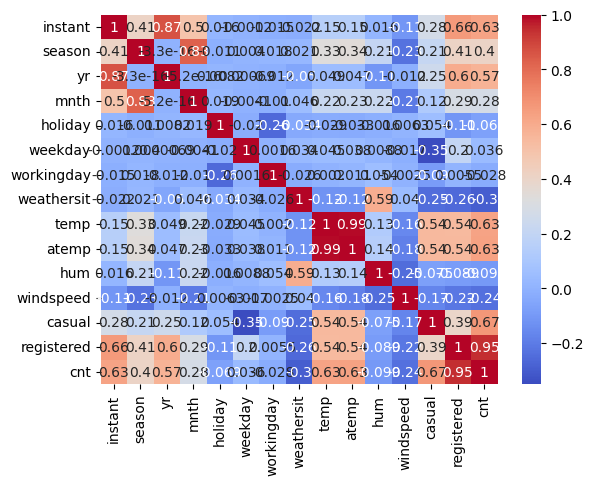

In [ ]:
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
bikesharing['date'] = pd.to_datetime(bikesharing['dteday'], errors='coerce')

In [ ]:
bikesharing['yr'] = bikesharing['yr'].astype('category').cat.codes

In [ ]:
x= bikesharing['atemp']
y= bikesharing['cnt']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
x_train.head()

,atemp
653,23.0423
576,33.1448
426,20.6746
728,11.5850
482,18.8752


In [ ]:
y_train.head()

,cnt
653,7534
576,7216
426,4066
728,1796
482,4220


In [ ]:
x_train_sm = sm.add_constant(x_train)

In [ ]:
lr_obj = sm.OLS(y_train, x_train_sm)

In [ ]:
lr = lr_obj.fit()